
# Chapter 6 -> Spark ETL with APIs

Task to do 
1. Call API and load data into Dataframe 
2. Create temp table or view and analyse data 
3. Filter data and store into CSV format on file server

Reference:<br/>
https://api.publicapis.org/entries



In [1]:
# First Load all the required library and also Start Spark Session
# Load all the required library
from pyspark.sql import SparkSession

In [2]:
#Start Spark Session
spark = SparkSession.builder.appName("chapter6").getOrCreate()
sqlContext = SparkSession(spark)
#Dont Show warning only error
spark.sparkContext.setLogLevel("ERROR")

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/03/05 06:22:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
#import package for calling API and formating JSON
import requests
import json

url = "https://api.publicapis.org/entries"
response = requests.request("GET", url)

# print(response.text)
jsontext = json.loads(response.text)
print(jsontext["count"])

1425


We are just moving entries of open API into separate list 
For now json response is like below 

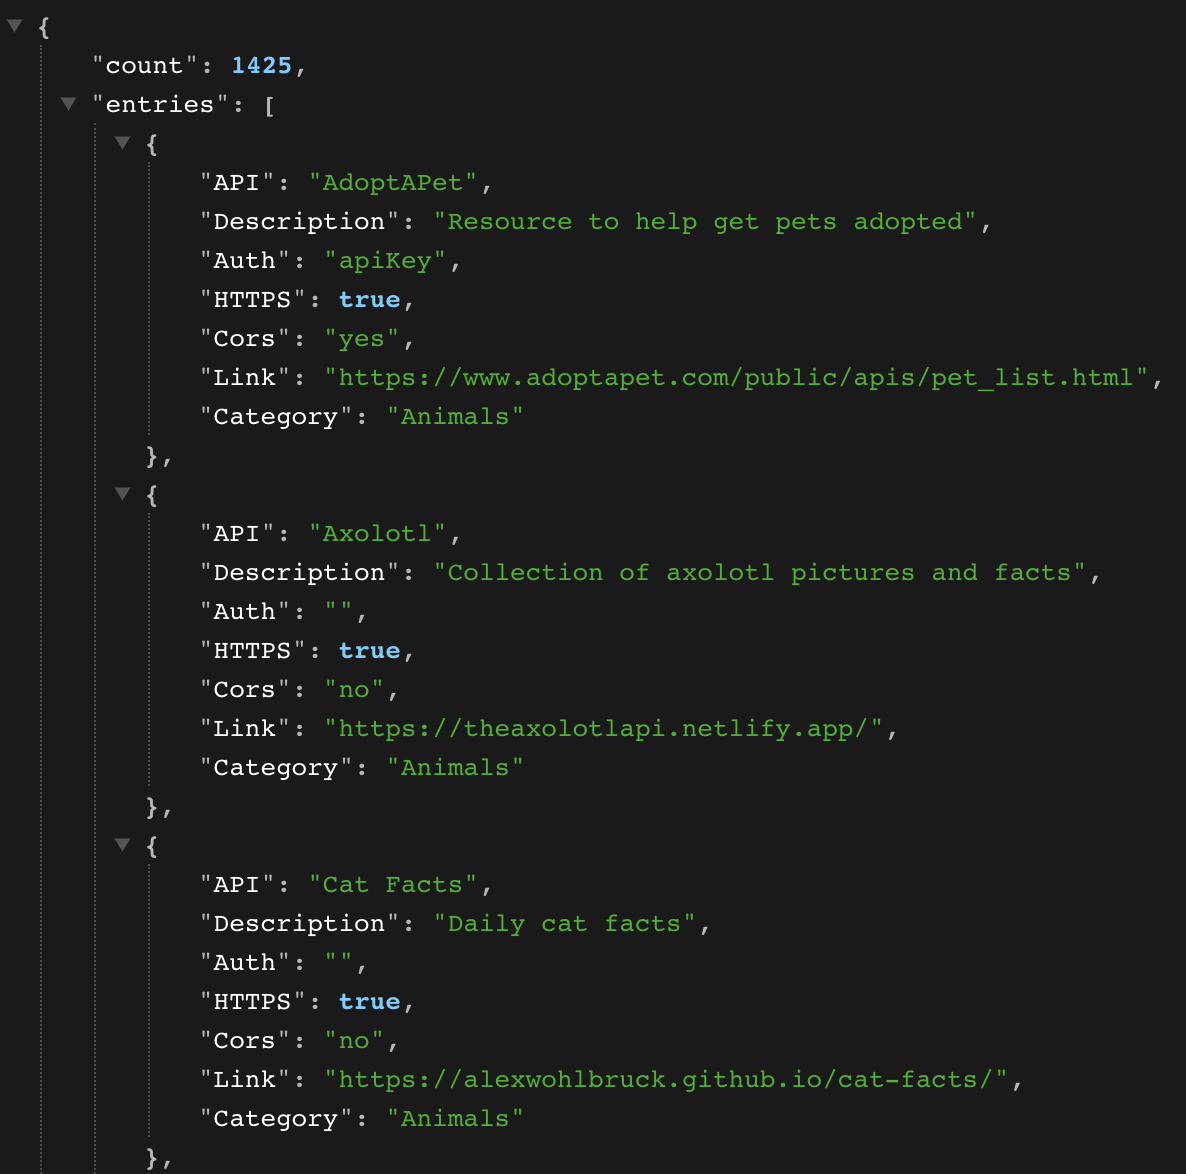

2. Create temp table or view and analyse data 

In [4]:
jsonentries = jsontext["entries"]

Now, we want to convert this into Dataframe 
But before converting into Dataframe, we need to understand that what is type of this variable so we can use way to create dataframe from it

In [5]:
type(jsonentries)

list

In [6]:
#Create dataframe
listdf = spark.createDataFrame(data=jsonentries)

In [7]:
#print Schema of dataframe
listdf.printSchema()

root
 |-- API: string (nullable = true)
 |-- Auth: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Cors: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- HTTPS: boolean (nullable = true)
 |-- Link: string (nullable = true)



In [8]:
#list first 20 open APIs
listdf.show()

+-----------+------+--------+----+--------------------+-----+--------------------+
|        API|  Auth|Category|Cors|         Description|HTTPS|                Link|
+-----------+------+--------+----+--------------------+-----+--------------------+
|  AdoptAPet|apiKey| Animals| yes|Resource to help ...| true|https://www.adopt...|
|    Axolotl|      | Animals|  no|Collection of axo...| true|https://theaxolot...|
|  Cat Facts|      | Animals|  no|     Daily cat facts| true|https://alexwohlb...|
|     Cataas|      | Animals|  no|Cat as a service ...| true| https://cataas.com/|
|       Cats|apiKey| Animals|  no|Pictures of cats ...| true|https://docs.thec...|
|  Dog Facts|      | Animals| yes|    Random dog facts| true|https://dukengn.g...|
|  Dog Facts|      | Animals| yes|Random facts of Dogs| true|https://kinduff.g...|
|       Dogs|      | Animals| yes|Based on the Stan...| true|https://dog.ceo/d...|
|      eBird|apiKey| Animals|  no|Retrieve recent o...| true|https://documente...|
|  F

In [9]:
# Creating Temp Table or HIVE table
listdf.createOrReplaceTempView("tmpOpenAPI")

In [10]:
sqlContext.sql("SELECT DISTINCT(Category) FROM tmpOpenAPI").show()

+--------------------+
|            Category|
+--------------------+
|Continuous Integr...|
|       Entertainment|
|        Food & Drink|
|             Finance|
|               Email|
|      Cryptocurrency|
|               Books|
|            Calendar|
|               Anime|
|Cloud Storage & F...|
|      Games & Comics|
|              Events|
|         Development|
|            Business|
|Documents & Produ...|
|             Animals|
|        Anti-Malware|
|         Environment|
|           Geocoding|
|     Data Validation|
+--------------------+
only showing top 20 rows



In [11]:
emaildf = sqlContext.sql("SELECT * FROM tmpOpenAPI WHERE Category = 'Email'")

3. Filter data and store into CSV format on file server
4. Filter data and store into JSON format

In [13]:
emaildf.write.format("csv").save('email.csv')

In [16]:
emaildf.write.format("JSON").save('emailJSON')